In [1]:
print("""
@File         : 2-formatting_plots.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-16 15:32:32
@Email        : cuixuanstephen@gmail.com
@Description  : Formatting plots with matplotlib
""")


@File         : 2-formatting_plots.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2025-08-16 15:32:32
@Email        : cuixuanstephen@gmail.com
@Description  : Formatting plots with matplotlib



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv',
    index_col='date',
    parse_dates=True
)
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

#### Titles and labels

Text(0, 0.5, 'price ($)')

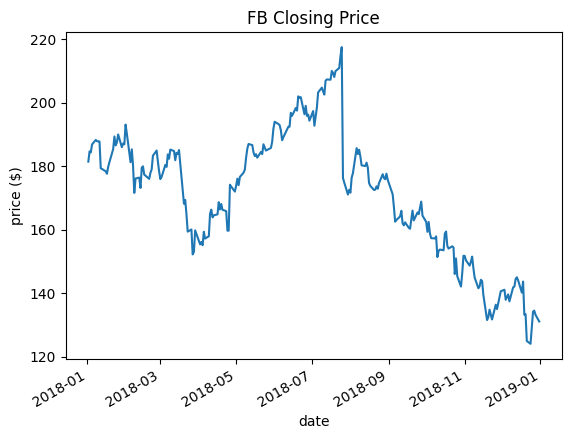

In [4]:
fb['close'].plot()
plt.title("FB Closing Price")
plt.xlabel("date")
plt.ylabel("price ($)")

Text(0, 0.5, 'Price ($)')

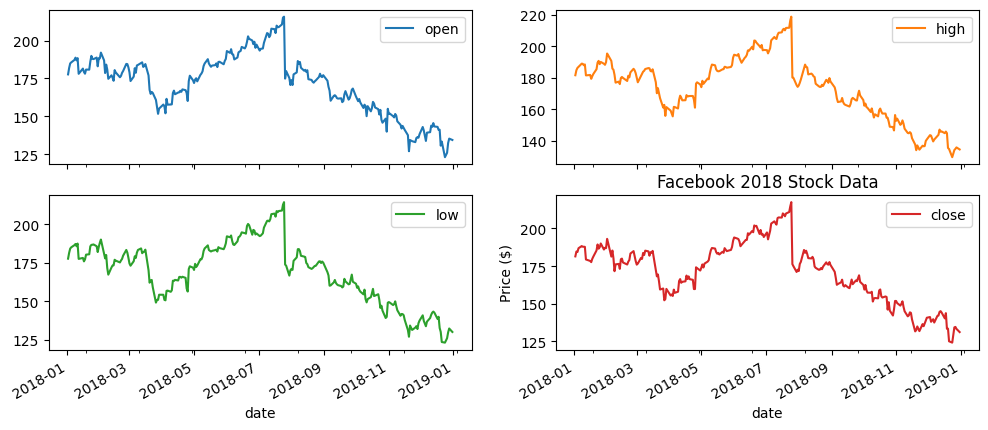

In [6]:
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))

plt.title("Facebook 2018 Stock Data")
plt.ylabel("Price ($)")

Text(0.5, 0.98, 'Facebook 2018 Stock Data')

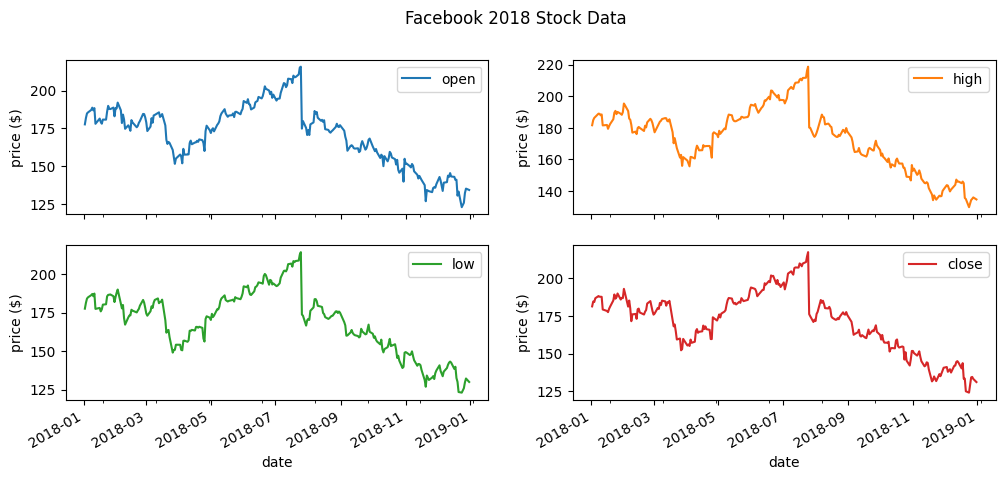

In [8]:
axes = fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
for ax in axes.flatten():
    ax.set_ylabel("price ($)")

plt.suptitle("Facebook 2018 Stock Data")
# plt.ylabel("Price ($)")

#### Legends

Text(0, 0.5, 'price ($)')

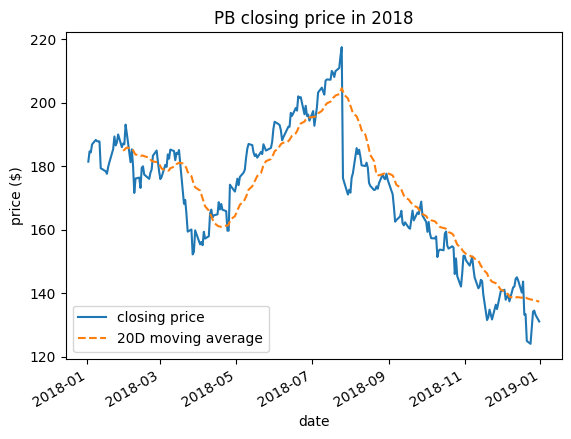

In [11]:
fb.assign(
    ma=lambda x: x['close'].rolling(20).mean()
).plot(
    y=['close', 'ma'],
    title="PB closing price in 2018",
    label=['closing price', '20D moving average'],
    style=['-', '--']
)

plt.legend(loc='lower left')
plt.ylabel('price ($)')

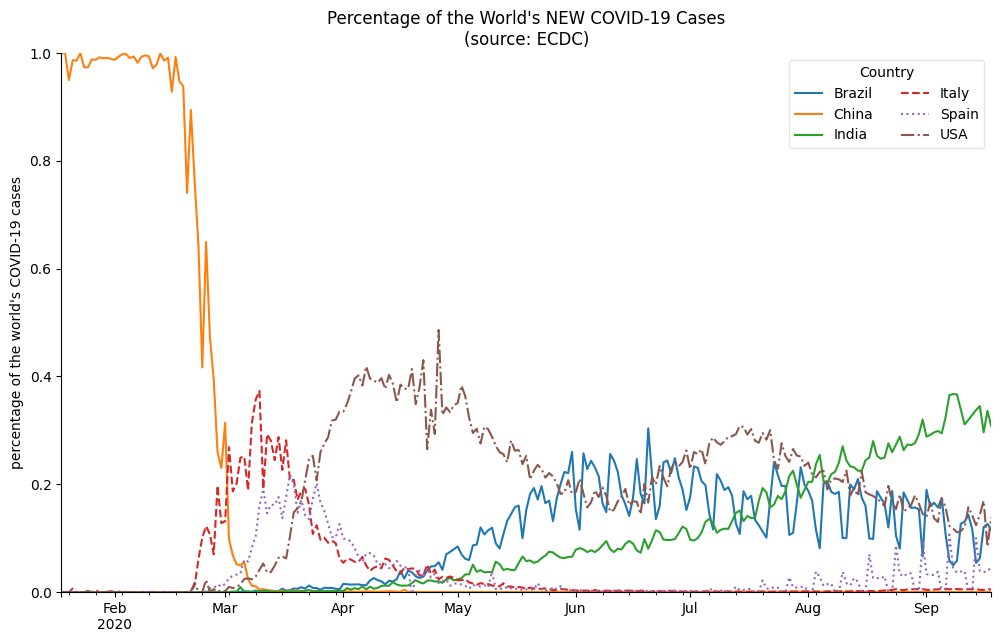

In [ ]:
new_cases = covid.reset_index().pivot(
    index='date', columns='countriesAndTerritories',
    values='cases'
).fillna(0)

pct_new_cases = new_cases.apply(
    lambda x: x / x.sum(), axis='columns'
)[['Italy', "China", "Spain", "USA", "India", "Brazil"]].sort_index(axis='columns').fillna(0)

ax = pct_new_cases.plot(
    figsize=(12, 7),
    style=['-'] * 3 + ['--', ':', '-.'],
    title="Percentage of the World\'s NEW COVID-19 Cases\n(source: ECDC)"
)
ax.legend(title='Country', framealpha=.5, ncol=2)
ax.set_xlabel("")
ax.set_ylabel("percentage of the world\'s COVID-19 cases")

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

#### Formatting axes

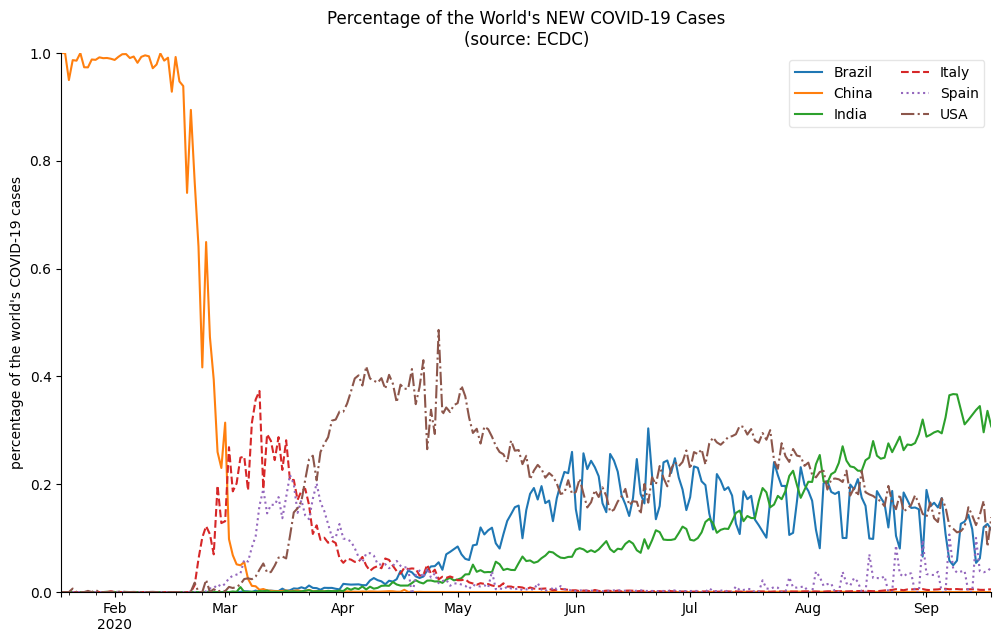

In [21]:
ax = pct_new_cases.plot(
    figsize=(12, 7),
    style=['-'] * 3 + ['--', ':', '-.'],
    title="Percentage of the World\'s NEW COVID-19 Cases\n(source: ECDC)"
)
ax.legend(framealpha=.5, ncol=2)
ax.set_xlabel("")
ax.set_ylabel("percentage of the world\'s COVID-19 cases")
ax.set_ylim(0, 1)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

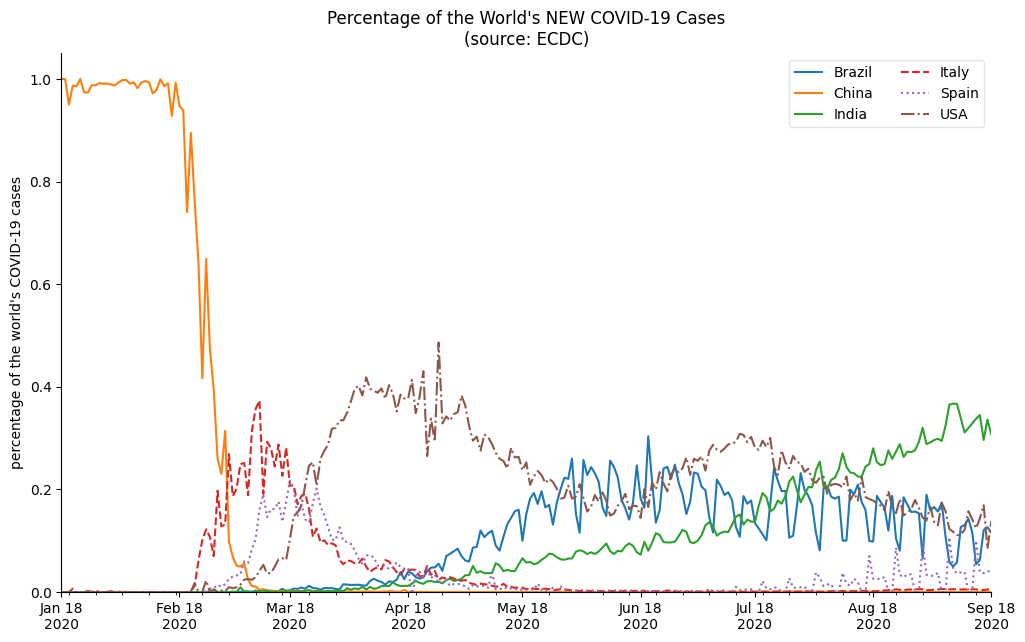

In [24]:
ax = pct_new_cases.plot(
    figsize=(12, 7),
    style=['-'] * 3 + ['--', ':', '-.'],
    title="Percentage of the World\'s NEW COVID-19 Cases\n(source: ECDC)"
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(framealpha=.5, ncol=2)
ax.set_xlabel("")
ax.set_ylabel("percentage of the world\'s COVID-19 cases")
ax.set_ylim(0, None)

for spine in ['top', "right"]:
    ax.spines[spine].set_visible(False)

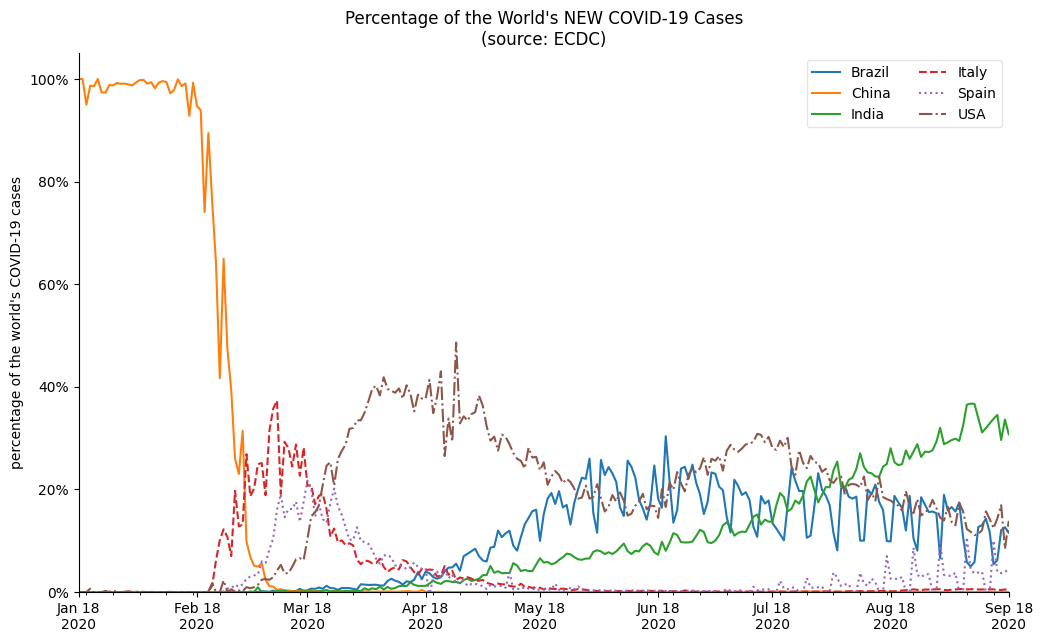

In [26]:
from matplotlib.ticker import PercentFormatter

ax = pct_new_cases.plot(
    figsize=(12, 7),
    style=['-'] * 3 + ['--', ':', '-.'],
    title="Percentage of the World\'s NEW COVID-19 Cases\n(source: ECDC)"
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(framealpha=.5, ncol=2)
ax.set_xlabel("")
ax.set_ylabel("percentage of the world\'s COVID-19 cases")
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

for spine in ['top', "right"]:
    ax.spines[spine].set_visible(False)

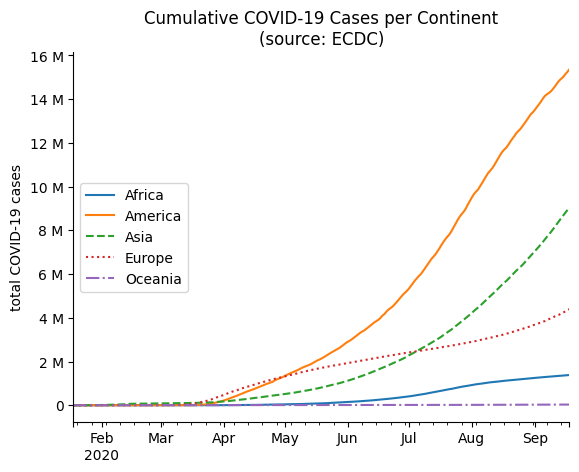

In [39]:
from matplotlib.ticker import EngFormatter

ax = covid.query('continentExp != "Other"').groupby(
    ['continentExp', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).cumsum().plot(
    style=['-', '-', '--', ':', '-.'],
    title="Cumulative COVID-19 Cases per Continent\n(source: ECDC)"
)

ax.legend(title='', loc="center left")
ax.set(xlabel='', ylabel='total COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', "right"]:
    ax.spines[spine].set_visible(False)

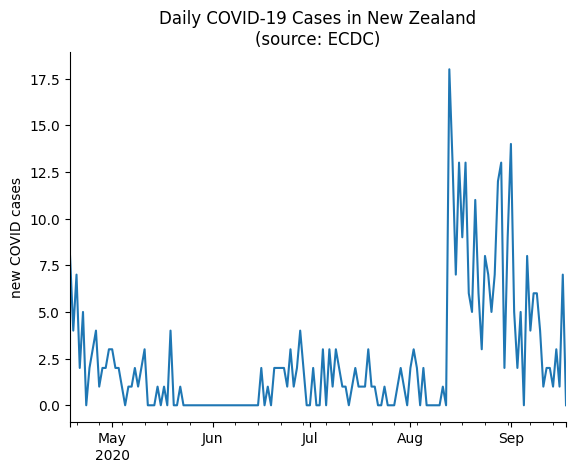

In [42]:
ax = new_cases.loc['2020-04-18':'2020-09-18', "New_Zealand"].plot(
    title="Daily COVID-19 Cases in New Zealand\n(source: ECDC)"
)
ax.set(xlabel="", ylabel="new COVID cases")

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

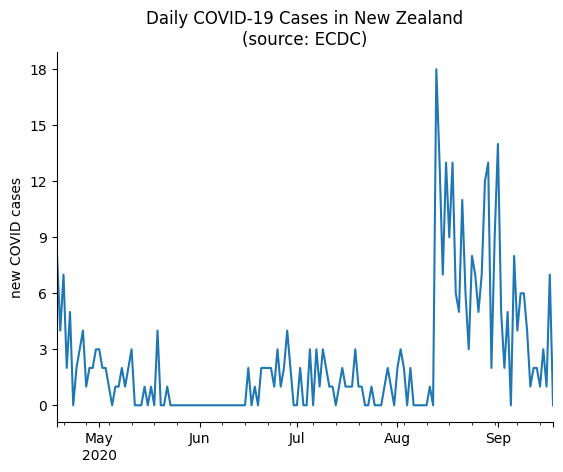

In [44]:
from matplotlib.ticker import MultipleLocator

ax = new_cases.loc['2020-04-18':'2020-09-18', "New_Zealand"].plot(
    title="Daily COVID-19 Cases in New Zealand\n(source: ECDC)"
)
ax.set(xlabel="", ylabel="new COVID cases")
ax.yaxis.set_major_locator(MultipleLocator(base=3))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)